# Regression

## Load Dataset

In [1]:
from pycaret.regression import *

import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('C:/Users/piett/Intro Pycaret/Pycaret3/data/europeBnB.csv')
print(data.shape)
data.head()

(51707, 17)


,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,european_city,weekday_or_weekend,cost per night cad,attr_index,rest_index
0,Entire home/apt,4,True,1,0,10,96,1,0.407278,0.304570,23.73168,37.97776,Athens,weekend,101.443536,240.306496,407.167958
1,Entire home/apt,4,True,1,0,10,99,1,4.367463,0.297474,23.72712,38.01435,Athens,weekend,66.887728,39.802996,58.706522
2,Private room,2,False,0,0,10,100,1,2.194174,0.385247,23.73391,37.99529,Athens,weekend,55.939353,78.734001,113.326684
3,Entire home/apt,4,True,0,1,10,100,2,2.508982,0.563474,23.73200,37.99800,Athens,weekend,110.852295,68.774881,101.162069
4,Entire home/apt,2,True,1,0,10,95,1,2.740581,0.725046,23.73100,38.00000,Athens,weekend,72.019778,62.902859,92.611125


<AxesSubplot: ylabel='cost per night cad'>

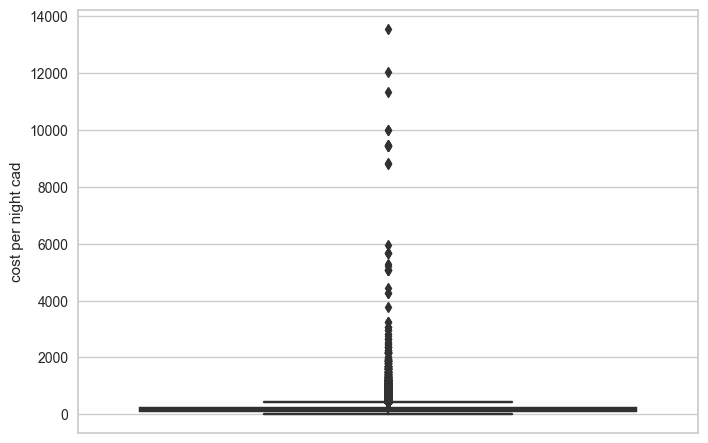

In [3]:
sns.boxplot(data=data, y='cost per night cad')

## Prepare the data

In [4]:
data_outliers = data[data['cost per night cad']>380.00]
data_outliers.shape

data= data.drop(data_outliers.index)
print(f'Data for model: {data.shape}, \nData for unseen predicitions: {data_outliers.shape}')
data_outliers.to_csv('C:/Users/piett/Intro Pycaret/Pycaret3/data/euBnB_outliers.csv', index=False)

Data for model: (47018, 17), 
Data for unseen predicitions: (4689, 17)


<AxesSubplot: ylabel='cost per night cad'>

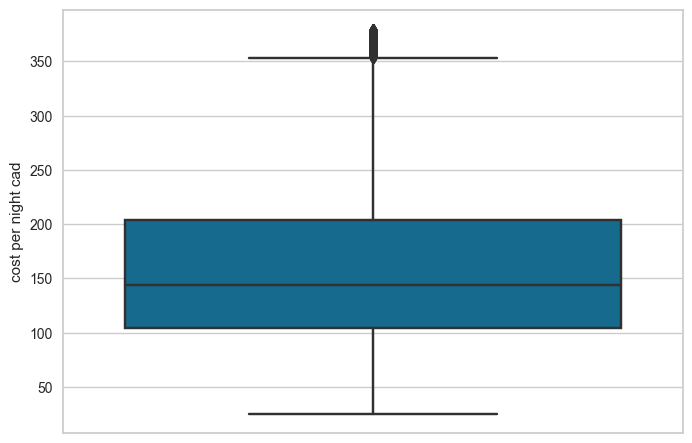

In [5]:
sns.boxplot(data=data, y='cost per night cad') 

#### Unseen data

In [6]:
data_unseen = data.sample(frac=0.1)
data= data.drop(data_unseen.index)
print(f'Data for model: {data.shape}, \nData for unseen predicitions: {data_unseen.shape}')
data_unseen.to_csv('C:/Users/piett/Intro Pycaret/Pycaret3/data/euBnB_unseen.csv', index=False)

Data for model: (42316, 17), 
Data for unseen predicitions: (4702, 17)


In [7]:
#data= data.drop(columns=['lng','lat'],axis=1)
#data

## Setup

In [8]:
from pycaret.regression import *
s = setup(data, target = 'cost per night cad', ignore_features=['lng','lat'])

,Description,Value
0,Session id,6871
1,Target,cost per night cad
2,Target type,Regression
3,Original data shape,"(42316, 17)"
4,Transformed data shape,"(42316, 26)"
5,Transformed train set shape,"(29621, 26)"
6,Transformed test set shape,"(12695, 26)"
7,Ignore features,2
8,Ordinal features,1
9,Numeric features,10


In [9]:
transform = s.dataset_transformed
transform.to_csv('C:/Users/piett/Intro Pycaret/Pycaret3/data/euBnB_transformed.csv', index=False)

#### Early EDA optional

In [10]:
#eda();

## Compare Models

In [11]:
#models()

In [12]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,25.5842,1350.7073,36.7466,0.7595,0.2207,0.1724,6.6250
et,Extra Trees Regressor,24.7052,1358.5235,36.8524,0.7581,0.2206,0.1654,4.4370
catboost,CatBoost Regressor,30.5691,1708.8254,41.3333,0.6957,0.2489,0.2051,5.9060
xgboost,Extreme Gradient Boosting,30.5325,1716.7841,41.4260,0.6943,0.2501,0.2055,4.0770
lightgbm,Light Gradient Boosting Machine,31.8889,1844.3590,42.9401,0.6716,0.2597,0.2159,3.3720
gbr,Gradient Boosting Regressor,34.5859,2103.3739,45.8562,0.6255,0.2770,0.2360,4.3800
dt,Decision Tree Regressor,29.5974,2398.3777,48.9684,0.5728,0.2870,0.1959,3.0320
lr,Linear Regression,37.8398,2445.4534,49.4462,0.5645,0.3276,0.2597,4.0140
ridge,Ridge Regression,37.8400,2445.4523,49.4462,0.5645,0.3275,0.2597,3.0500
br,Bayesian Ridge,37.8401,2445.4533,49.4462,0.5645,0.3274,0.2597,2.9380


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=6871)

#### Create model choosen from above:

In [13]:
xgb = create_model('xgboost')
t_xgb= tune_model(xgb)
f_xgb = finalize_model(t_xgb)
f_xgb

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31.5388,1834.7891,42.8344,0.6904,0.2583,0.2112
1,30.3769,1690.3409,41.1138,0.6868,0.2481,0.2026
2,31.4370,1818.2323,42.6407,0.6614,0.2589,0.2136
3,30.3581,1688.7076,41.0939,0.7108,0.2485,0.2056
4,30.4807,1756.7120,41.9131,0.6987,0.2488,0.2013
5,30.8986,1720.8740,41.4834,0.6968,0.2498,0.2063
6,30.0797,1680.4141,40.9929,0.6949,0.2485,0.2013
7,29.6180,1605.5980,40.0699,0.7108,0.2450,0.2046
8,29.8304,1646.3970,40.5758,0.7005,0.2466,0.2015


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32.0318,1841.2118,42.9093,0.6893,0.2587,0.2146
1,31.0702,1742.8436,41.7474,0.6771,0.2503,0.2070
2,31.5008,1804.4858,42.4792,0.6640,0.2581,0.2137
3,31.3636,1773.6180,42.1143,0.6962,0.2533,0.2117
4,31.5250,1829.6927,42.7749,0.6862,0.2536,0.2085
5,31.6706,1778.9247,42.1773,0.6866,0.2530,0.2117
6,30.7470,1740.4384,41.7186,0.6840,0.2500,0.2057
7,30.4432,1668.4537,40.8467,0.6994,0.2496,0.2109
8,30.7760,1722.9156,41.5080,0.6865,0.2501,0.2062


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Pipeline(memory=FastMemory(location=C:\Users\piett\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['person_capacity', 'multi', 'biz',
                                             'cleanliness_rating',
                                             'guest_satisfaction_overall',
                                             'bedrooms', 'dist', 'metro_dist',
                                             'attr_index', 'rest_index'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(incl...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=-1, num_parallel_tree=None, predictor=None,
                              random_state=6871, ...))])

#### Print out graphs of value from the evaluation:

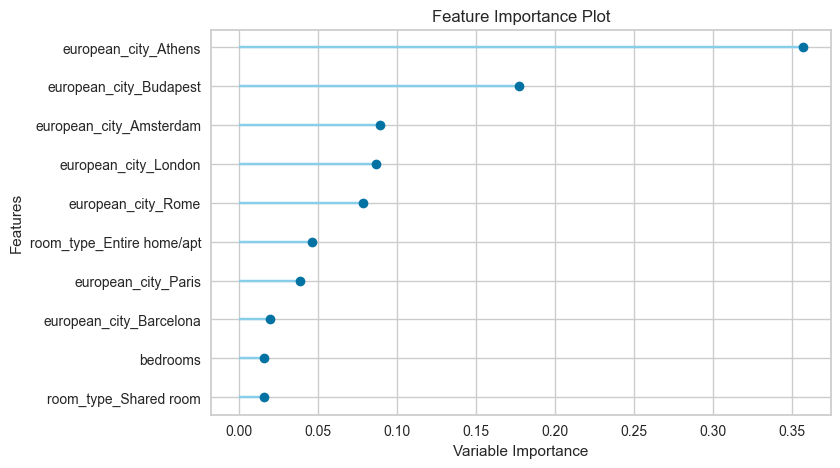

In [14]:
plot_model(xgb,plot='feature')

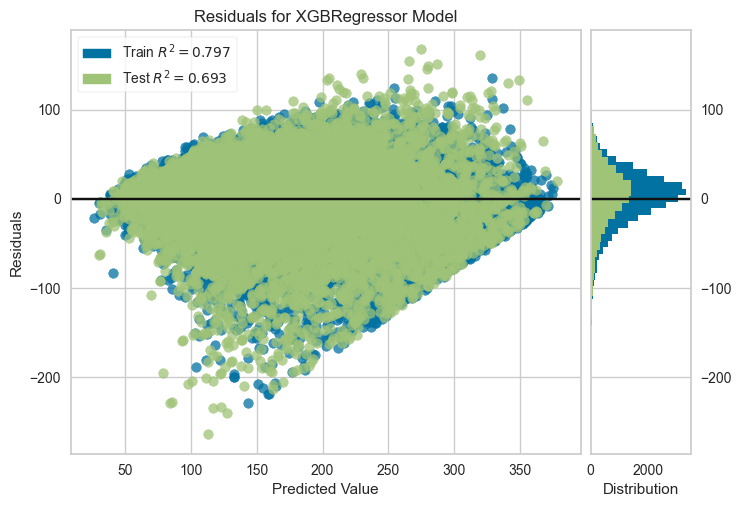

In [15]:
plot_model(xgb,plot='residuals')

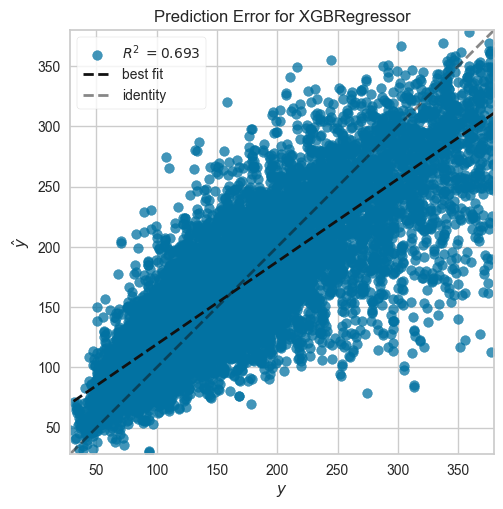

In [16]:
plot_model(xgb, plot='error')

In [17]:
#plot_model(model, plot='residuals_interactive')

## Predict Model From Finalized

In [18]:
pred = predict_model(f_xgb,data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,29.9787,1663.5615,40.7868,0.7026,0.2449,0.1997


In [20]:
pred = pred.loc[:,['cost per night cad','prediction_label']]
pred['Percent Diff'] = (pred['cost per night cad']-pred['prediction_label'])/pred['cost per night cad']
pred

,cost per night cad,prediction_label,Percent Diff
44373,232.737305,216.384613,0.070262
17486,117.681061,102.628845,0.127907
41446,185.516571,158.015503,0.148240
30196,236.599442,119.366318,0.495492
44073,207.313660,198.116470,0.044364
...,...,...,...
26165,347.003448,264.874176,0.236681
30206,66.768295,106.429878,-0.594018
38969,137.217407,168.071243,-0.224854
34673,191.775436,163.454208,0.147679


In [21]:
pred.describe().T

,count,mean,std,min,25%,50%,75%,max
cost per night cad,4702.0,162.958496,74.800034,27.104385,104.927343,146.381439,205.588238,379.262878
prediction_label,4702.0,161.781586,61.553555,40.835510,114.499157,149.713554,198.291168,437.036713
Percent Diff,4702.0,-0.057058,0.267601,-3.586988,-0.195113,-0.032867,0.116249,0.615465
